# **Estandarizacion**

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
sys.path.append("../../../")
from src import funciones_estandarizacion as fe

In [2]:
df = pd.read_pickle("../../../datos/cluster_1/df_nonulls_encoded_sinout.pkl").reset_index(drop=True)
print(df.shape)
df.head()

(19198, 19)


,Profit,Country,Market,Category,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,1172.88,132.874175,39.164447,65.454958,64.556749,4,0.0,336.65,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,355.44,100.498744,32.081321,28.878567,40.884178,4,0.0,333.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,161.76,83.733977,62.481031,65.454958,39.614989,4,0.0,332.96,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,65.70,137.993950,68.495338,28.878567,67.160688,5,0.0,327.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,280.44,137.993950,68.495338,65.454958,64.556749,4,0.0,326.32,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]

df_sin_vr = df.copy()
df_sin_vr.drop(columns=["Profit"], inplace=True)

df_estand, dic_scaler = fe.estandarizacion(df_sin_vr, df_sin_vr.columns, modelos_estand)
df_estand.head()

df_estand["Profit"] = df["Profit"]

df_estand

,Country,Market,Category,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country_standar,Market_standar,Category_standar,Sub-Category_standar,Quantity_standar,Discount_standar,Shipping Cost_standar,Ship Mode_First Class_standar,Ship Mode_Same Day_standar,Ship Mode_Second Class_standar,Ship Mode_Standard Class_standar,Segment_Consumer_standar,Segment_Corporate_standar,Segment_Home Office_standar,Order Priority_Critical_standar,Order Priority_High_standar,Order Priority_Low_standar,Order Priority_Medium_standar,Country_robust,Market_robust,Category_robust,Sub-Category_robust,Quantity_robust,Discount_robust,Shipping Cost_robust,Ship Mode_First Class_robust,Ship Mode_Same Day_robust,Ship Mode_Second Class_robust,Ship Mode_Standard Class_robust,Segment_Consumer_robust,Segment_Corporate_robust,Segment_Home Office_robust,Order Priority_Critical_robust,Order Priority_High_robust,Order Priority_Low_robust,Order Priority_Medium_robust,Country_minmax,Market_minmax,Category_minmax,Sub-Category_minmax,Quantity_minmax,Discount_minmax,Shipping Cost_minmax,Ship Mode_First Class_minmax,Ship Mode_Same Day_minmax,Ship Mode_Second Class_minmax,Ship Mode_Standard Class_minmax,Segment_Consumer_minmax,Segment_Corporate_minmax,Segment_Home Office_minmax,Order Priority_Critical_minmax,Order Priority_High_minmax,Order Priority_Low_minmax,Order Priority_Medium_minmax,Profit
0,132.874175,39.164447,65.454958,64.556749,4,0.0,336.65,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.169158,-0.469717,0.986136,0.452438,0.345153,-0.741199,6.127058,2.474049,-0.227535,-0.496775,-1.256992,0.963073,-0.658765,-0.466235,-0.270395,-0.651862,-0.222553,0.839717,1.427431,-0.070480,0.0,0.898166,0.5,-0.01,7.766658,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.782879,0.297216,1.0,0.728652,0.3,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1172.8800
1,100.498744,32.081321,28.878567,40.884178,4,0.0,333.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.723676,-0.876940,-1.014059,-0.181284,0.345153,-0.741199,6.055088,2.474049,-0.227535,-0.496775,-1.256992,-1.038343,1.517993,-0.466235,-0.270395,1.534067,-0.222553,-1.190877,0.828799,-0.303480,-1.0,-0.050947,0.5,-0.01,7.680600,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.702603,0.203251,0.0,0.604545,0.3,0.000000,0.989602,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,355.4400
2,83.733977,62.481031,65.454958,39.614989,4,0.0,332.96,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.492994,0.870800,0.986136,-0.215261,0.345153,-0.741199,6.051181,-0.404196,-0.227535,2.012984,-1.256992,0.963073,-0.658765,-0.466235,3.698293,-0.651862,-0.222553,-1.190877,0.518812,0.696520,0.0,-0.101834,0.5,-0.01,7.675928,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.661034,0.606534,1.0,0.597891,0.3,0.000000,0.989038,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,161.7600
3,137.993950,68.495338,28.878567,67.160688,5,0.0,327.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.239606,1.216575,-1.014059,0.522147,0.846838,-0.741199,5.939936,2.474049,-0.227535,-0.496775,-1.256992,0.963073,-0.658765,-0.466235,-0.270395,-0.651862,-0.222553,0.839717,1.522097,0.894361,-1.0,1.002567,1.0,-0.01,7.542906,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795574,0.686319,0.0,0.742303,0.4,0.000000,0.972966,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65.7000
4,137.993950,68.495338,65.454958,64.556749,4,0.0,326.32,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.239606,1.216575,0.986136,0.452438,0.345153,-0.741199,5.914644,-0.404196,-0.227535,2.012984,-1.256992,0.963073,-0.658765,-0.466235,-0.270395,1.534067,-0.222553,-1.190877,1.522097,0.894361,0.0,0.898166,0.5,-0.01,7.512663,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.795574,0.686319,1.0,0.728652,0.3,0.000000,0.969312,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,280.4400
...,...,...,...,...,...,...,.

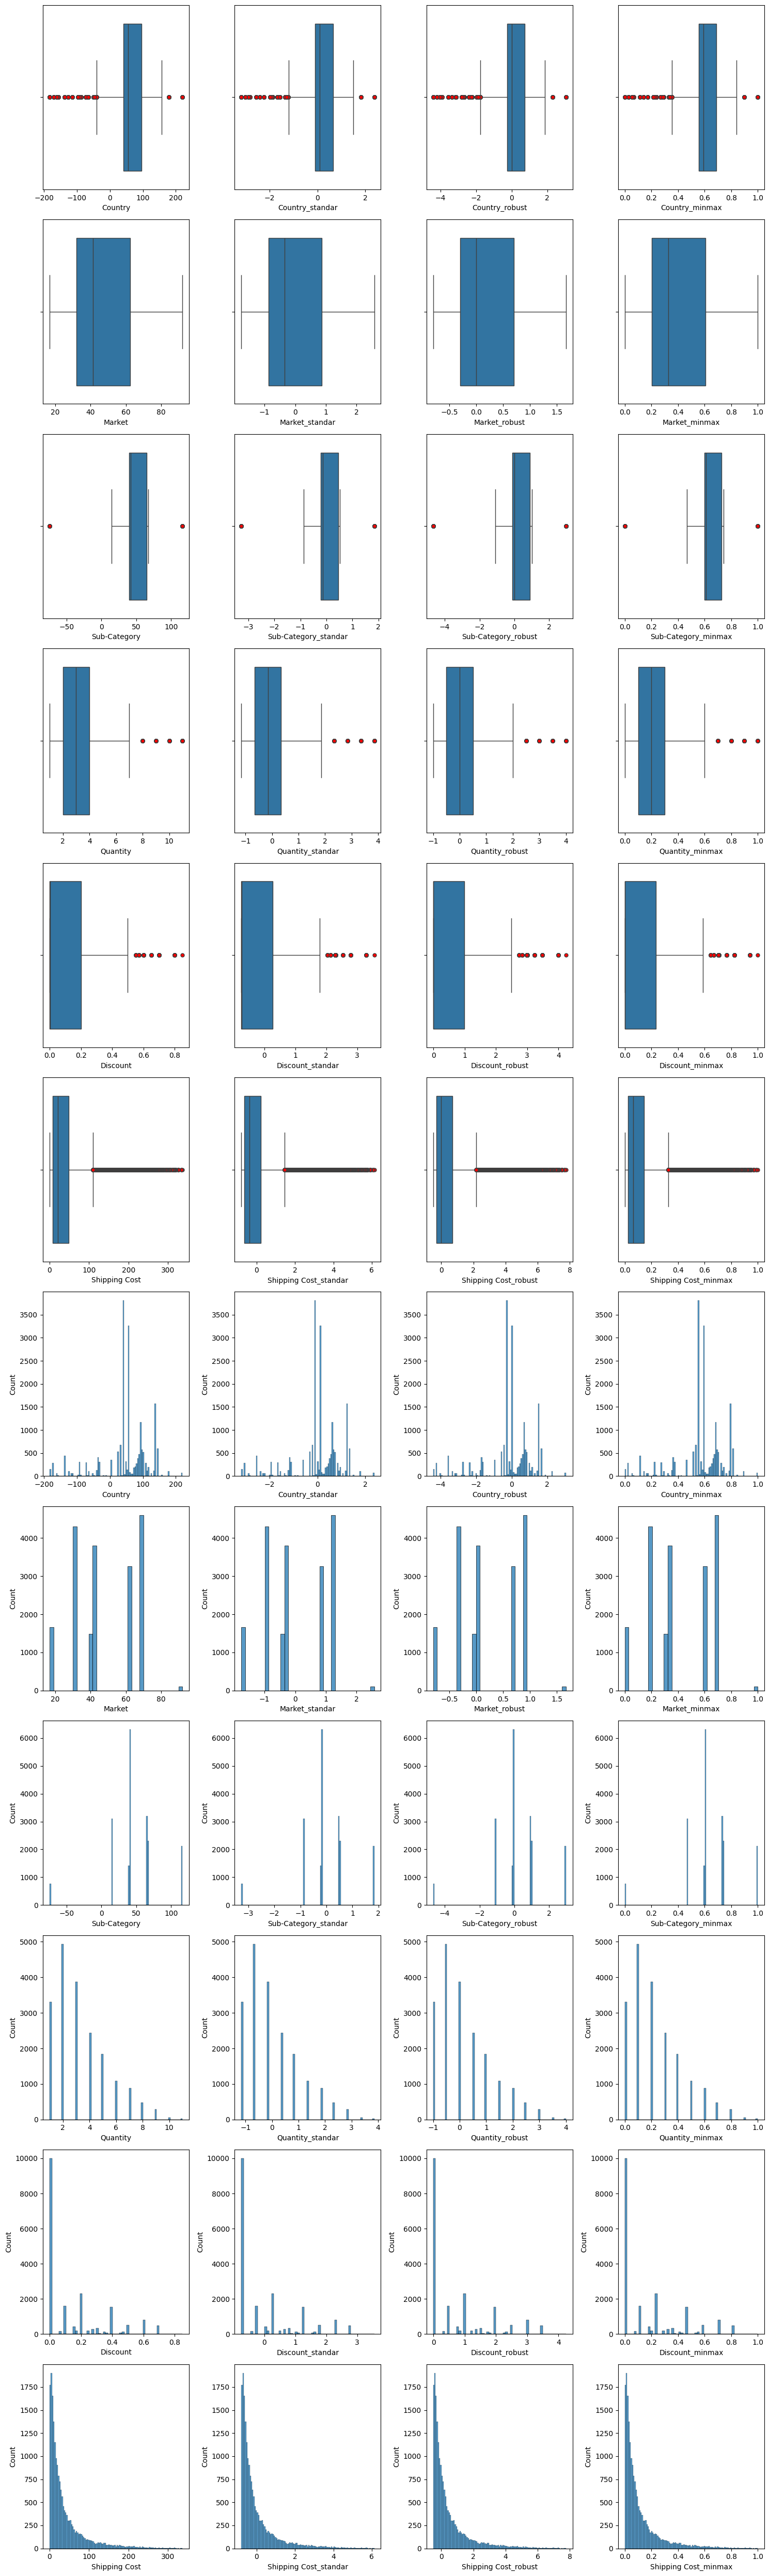

In [4]:
columnas = ['Country', 'Market', 'Sub-Category', 'Quantity', 'Discount','Shipping Cost']
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand, figsize=(15,50))

En base a las distribuciones y conociendo los outliers vamos a optar como primera opción por un standar scaler.

In [5]:
scaler="standar"
vr = "Profit"

df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=True)]

## Mover la columna de la variable respuesta al principio
df_scaled = df_scaled[[vr] + [col for col in df_scaled.columns if col != vr]]
df_scaled.columns = df_scaled.columns.str.replace(f"_{scaler}", "", regex=False)

df_scaled.head(2)

,Profit,Country,Market,Category,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,1172.88,1.169158,-0.469717,0.986136,0.452438,0.345153,-0.741199,6.127058,2.474049,-0.227535,-0.496775,-1.256992,0.963073,-0.658765,-0.466235,-0.270395,-0.651862,-0.222553,0.839717
1,355.44,0.723676,-0.876940,-1.014059,-0.181284,0.345153,-0.741199,6.055088,2.474049,-0.227535,-0.496775,-1.256992,-1.038343,1.517993,-0.466235,-0.270395,1.534067,-0.222553,-1.190877


Guardamos el scalres y el nuevo df:

In [6]:
with open('../../../datos/cluster_1/preprocesamiento/robust_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler["robust"], f)

df_scaled.to_pickle("../../../datos/cluster_1/df_nonulls_encoded_sinout_scaled.pkl")